<a href="https://colab.research.google.com/github/roshanJayasekara/M5-forecating/blob/main/department_and_sore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
from keras.utils.vis_utils import plot_model,model_to_dot

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df=pd.read_csv("/content/drive/My Drive/M5 forecasting/sales_train_evaluation.csv")

In [ ]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


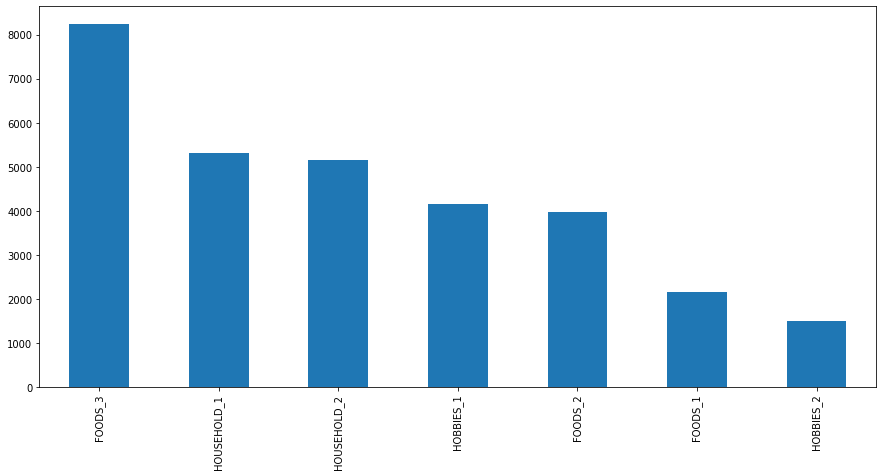

In [ ]:
df["dept_id"].value_counts().plot(kind="bar",figsize=(15,7))

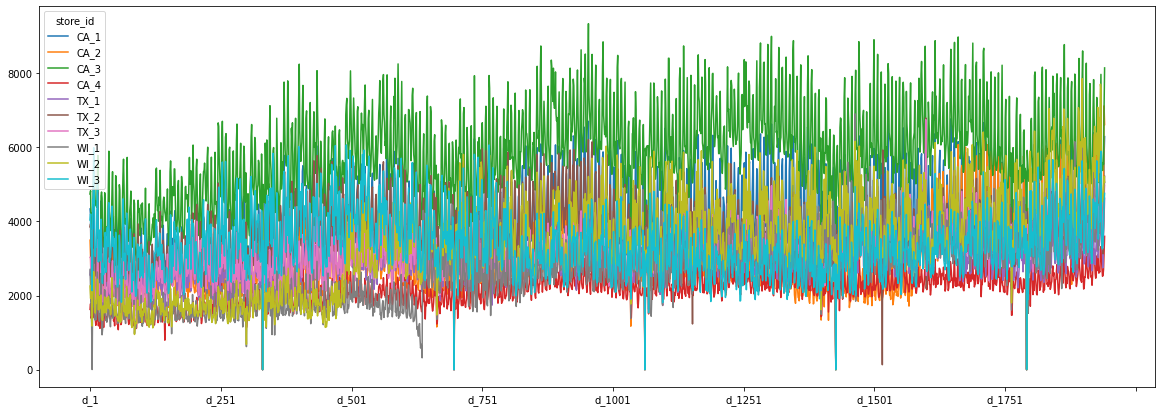

In [ ]:
df.groupby("store_id").sum().T.plot(figsize=(20,7))

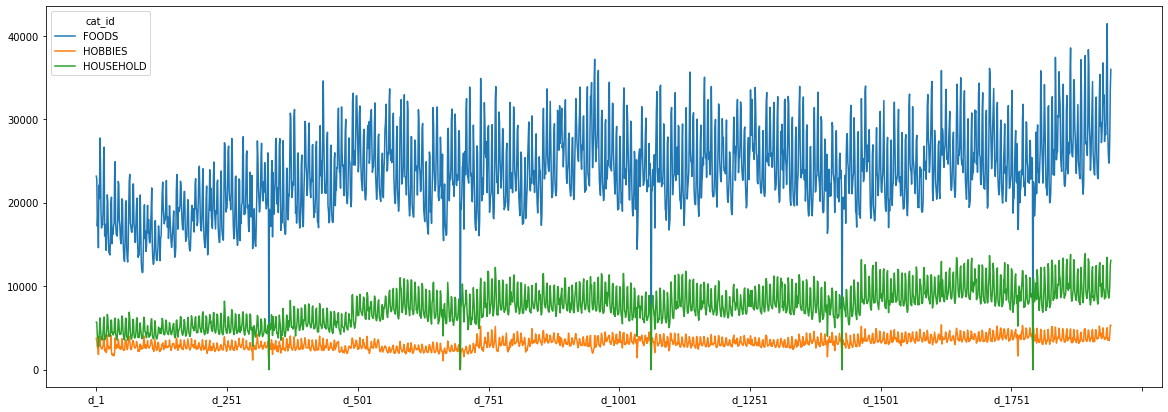

In [ ]:
df.groupby("cat_id").sum().T.plot(figsize=(20,7))

In [ ]:
df["type"]=df["store_id"]+"_"+df["dept_id"]

In [ ]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,type
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1,CA_1_HOBBIES_1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,CA_1_HOBBIES_1
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1,CA_1_HOBBIES_1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6,CA_1_HOBBIES_1
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0,CA_1_HOBBIES_1


In [ ]:
store_with_type=df.groupby("type").sum().T

In [ ]:
store_with_type.head()

type,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,TX_2_HOUSEHOLD_1,TX_2_HOUSEHOLD_2,TX_3_FOODS_1,TX_3_FOODS_2,TX_3_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_3_FOODS_1,WI_3_FOODS_2,WI_3_FOODS_3,WI_3_HOBBIES_1,WI_3_HOBBIES_2,WI_3_HOUSEHOLD_1,WI_3_HOUSEHOLD_2
d_1,297,674,2268,528,28,361,181,406,212,1575,522,16,529,234,341,627,2478,531,19,457,286,113,351,759,158,0,180,64,152,390,1239,241,10,418,106,210,534,2044,364,21,480,199,138,460,1686,232,11,383,120,343,108,1130,598,17,360,148,191,155,1269,180,10,353,98,152,583,2293,256,22,584,148
d_2,284,655,2198,489,9,350,170,408,227,1286,381,16,461,267,326,758,2451,401,29,521,341,124,347,798,231,5,183,89,154,369,1380,246,18,372,148,169,584,2117,320,39,525,183,123,473,1661,209,38,364,138,306,83,938,433,10,273,151,184,128,1121,120,7,268,94,138,585,2383,342,14,541,195
d_3,214,396,1398,409,6,279,114,238,138,913,352,16,306,158,260,544,1897,414,24,415,231,75,237,634,247,4,116,73,109,255,1013,96,11,269,69,159,390,1533,194,35,303,117,113,363,1189,145,45,273,97,208,77,692,317,6,196,66,154,199,1233,95,18,250,69,127,575,1841,228,20,420,106
d_4,175,476,1607,383,9,278,123,240,174,1126,344,6,270,164,231,549,2284,395,29,480,264,97,253,652,230,9,120,79,126,418,1099,229,19,276,91,107,472,1601,332,27,307,108,84,426,1137,195,7,237,83,145,61,729,131,6,132,47,205,244,1564,109,15,305,80,98,533,1965,183,11,327,94
d_5,182,354,1496,263,5,195,135,220,102,956,283,13,217,151,220,543,1998,344,20,420,272,107,240,760,249,4,103,73,108,356,865,91,11,196,67,128,419,1343,231,26,247,98,61,368,954,126,16,155,46,0,0,2,0,0,0,0,96,147,724,57,1,118,32,87,340,1427,70,4,151,53


In [ ]:
calendar=pd.read_csv("/content/drive/My Drive/M5 forecasting/calendar.csv",parse_dates=True)
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.set_index(calendar["d"],inplace=True)
calendar.drop(labels="d",axis=1,inplace=True)

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
d,,,,,,,,,,,,,
d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


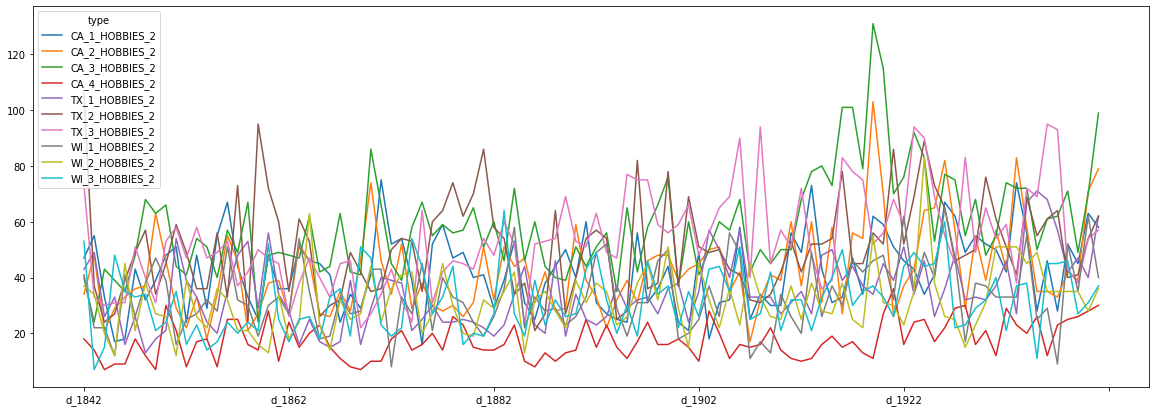

In [ ]:
store_with_type.filter(like='HOBBIES_2',axis=1).iloc[-100:].plot(figsize=(20,7))

In [ ]:
combined=pd.concat([store_with_type,calendar],axis=1,join="inner")

In [ ]:
combined.head()

,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,...,TX_3_FOODS_2,TX_3_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_3_FOODS_1,WI_3_FOODS_2,WI_3_FOODS_3,WI_3_HOBBIES_1,WI_3_HOBBIES_2,WI_3_HOUSEHOLD_1,WI_3_HOUSEHOLD_2,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
d_1,297,674,2268,528,28,361,181,406,212,1575,522,16,529,234,341,627,2478,531,19,457,286,113,351,759,158,0,180,64,152,390,1239,241,10,418,106,210,534,2044,364,21,...,460,1686,232,11,383,120,343,108,1130,598,17,360,148,191,155,1269,180,10,353,98,152,583,2293,256,22,584,148,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_2,284,655,2198,489,9,350,170,408,227,1286,381,16,461,267,326,758,2451,401,29,521,341,124,347,798,231,5,183,89,154,369,1380,246,18,372,148,169,584,2117,320,39,...,473,1661,209,38,364,138,306,83,938,433,10,273,151,184,128,1121,120,7,268,94,138,585,2383,342,14,541,195,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_3,214,396,1398,409,6,279,114,238,138,913,352,16,306,158,260,544,1897,414,24,415,231,75,237,634,247,4,116,73,109,255,1013,96,11,269,69,159,390,1533,194,35,...,363,1189,145,45,273,97,208,77,692,317,6,196,66,154,199,1233,95,18,250,69,127,575,1841,228,20,420,106,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_4,175,476,1607,383,9,278,123,240,174,1126,344,6,270,164,231,549,2284,395,29,480,264,97,253,652,230,9,120,79,126,418,1099,229,19,276,91,107,472,1601,332,27,...,426,1137,195,7,237,83,145,61,729,131,6,132,47,205,244,1564,109,15,305,80,98,533,1965,183,11,327,94,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
d_5,182,354,1496,263,5,195,135,220,102,956,283,13,217,151,220,543,1998,344,20,420,272,107,240,760,249,4,103,73,108,356,865,91,11,196,67,128,419,1343,231,26,...,368,954,126,16,155,46,0,0,2,0,0,0,0,96,147,724,57,1,118,32,87,340,1427,70,4,151,53,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
combined.drop(["wm_yr_wk","wday",'event_name_1', 'event_type_1','event_name_2', 'event_type_2'],axis=1,inplace=True)

In [ ]:
combined.drop(['weekday', 'month', 'year', 'snap_CA', 'snap_TX', 'snap_WI'],axis=1,inplace=True)

In [ ]:
combined.set_index(combined["date"],inplace=True)
combined.drop("date",axis=1,inplace=True)

In [ ]:
combined.isna().sum()

CA_1_FOODS_1        0
CA_1_FOODS_2        0
CA_1_FOODS_3        0
CA_1_HOBBIES_1      0
CA_1_HOBBIES_2      0
                   ..
WI_3_FOODS_3        0
WI_3_HOBBIES_1      0
WI_3_HOBBIES_2      0
WI_3_HOUSEHOLD_1    0
WI_3_HOUSEHOLD_2    0
Length: 70, dtype: int64

In [ ]:
"""encoder=OneHotEncoder(sparse=False)
x=encoder.fit_transform(combined[["weekday"]])
x=pd.DataFrame(x,columns=encoder.categories_,index=combined.index)
x.head()"""

'encoder=OneHotEncoder(sparse=False)\nx=encoder.fit_transform(combined[["weekday"]])\nx=pd.DataFrame(x,columns=encoder.categories_,index=combined.index)\nx.head()'

In [ ]:
#combined.drop("weekday",axis=1,inplace=True)

In [ ]:
#combined=pd.concat([combined,x],axis=1,join="inner")

In [ ]:
combined.head()

,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,TX_2_HOUSEHOLD_1,TX_2_HOUSEHOLD_2,TX_3_FOODS_1,TX_3_FOODS_2,TX_3_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_3_FOODS_1,WI_3_FOODS_2,WI_3_FOODS_3,WI_3_HOBBIES_1,WI_3_HOBBIES_2,WI_3_HOUSEHOLD_1,WI_3_HOUSEHOLD_2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,297,674,2268,528,28,361,181,406,212,1575,522,16,529,234,341,627,2478,531,19,457,286,113,351,759,158,0,180,64,152,390,1239,241,10,418,106,210,534,2044,364,21,480,199,138,460,1686,232,11,383,120,343,108,1130,598,17,360,148,191,155,1269,180,10,353,98,152,583,2293,256,22,584,148
2011-01-30,284,655,2198,489,9,350,170,408,227,1286,381,16,461,267,326,758,2451,401,29,521,341,124,347,798,231,5,183,89,154,369,1380,246,18,372,148,169,584,2117,320,39,525,183,123,473,1661,209,38,364,138,306,83,938,433,10,273,151,184,128,1121,120,7,268,94,138,585,2383,342,14,541,195
2011-01-31,214,396,1398,409,6,279,114,238,138,913,352,16,306,158,260,544,1897,414,24,415,231,75,237,634,247,4,116,73,109,255,1013,96,11,269,69,159,390,1533,194,35,303,117,113,363,1189,145,45,273,97,208,77,692,317,6,196,66,154,199,1233,95,18,250,69,127,575,1841,228,20,420,106
2011-02-01,175,476,1607,383,9,278,123,240,174,1126,344,6,270,164,231,549,2284,395,29,480,264,97,253,652,230,9,120,79,126,418,1099,229,19,276,91,107,472,1601,332,27,307,108,84,426,1137,195,7,237,83,145,61,729,131,6,132,47,205,244,1564,109,15,305,80,98,533,1965,183,11,327,94
2011-02-02,182,354,1496,263,5,195,135,220,102,956,283,13,217,151,220,543,1998,344,20,420,272,107,240,760,249,4,103,73,108,356,865,91,11,196,67,128,419,1343,231,26,247,98,61,368,954,126,16,155,46,0,0,2,0,0,0,0,96,147,724,57,1,118,32,87,340,1427,70,4,151,53


In [ ]:
days=30

In [ ]:
train=combined.iloc[:-days]
test=combined.iloc[-days:]

In [ ]:
print(train.shape)
print(test.shape)

(1911, 70)
(30, 70)


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaled=scaler.fit_transform(train)

In [ ]:
timesteps=30

In [ ]:
generator=TimeseriesGenerator(scaled,scaled,batch_size=3049, length=timesteps)

In [ ]:
X_train,y_train=generator[0]

In [ ]:
X_train.shape

(1881, 30, 70)

In [ ]:
y_train.shape

(1881, 70)

In [ ]:
"""scaled_test=scaler.transform(test)
generator=TimeseriesGenerator(scaled_test,scaled_test,batch_size=3049, length=days)
x_test,y_test=X_train,y_train=generator[0]
x_test.shape
y_test.shape"""

'scaled_test=scaler.transform(test)\ngenerator=TimeseriesGenerator(scaled_test,scaled_test,batch_size=3049, length=days)\nx_test,y_test=X_train,y_train=generator[0]\nx_test.shape\ny_test.shape'

# GRU_model

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import GRU,LSTM,ConvLSTM2D
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import TimeSeriesSplit
from keras.callbacks import EarlyStopping

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 6.2MB/s 


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
timeseriessplit=TimeSeriesSplit(n_splits=5)

In [ ]:
def Model(optimizer="adam",layer_1_units=300,layer_2_units=300,layer_3_units=300,dropout=0.1980,activation='tanh'):
    model=Sequential()
    
    #layer_1_units=40
    model.add(GRU(activation=activation,units = layer_1_units,dropout=dropout, 
                  return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    #model.add(Dropout(dropout))
    # Adding a second Grulayer and some Dropout regularisation
    #layer_2_units=neurons
    model.add(GRU(activation=activation,units = layer_2_units,return_sequences=True))
    model.add(Dropout(dropout))
    
    #layer_3_units=neurons
    model.add(GRU(activation=activation,dropout=dropout,units = layer_3_units))
    model.add(Dropout(dropout))
    
    model.add(Dense(units = train.shape[1]))
    
    model.compile(optimizer = optimizer, loss = 'mean_absolute_error',metrics=["mean_squared_error"])
    
    return model
    

In [ ]:
model = KerasRegressor(build_fn=Model,verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,restore_best_weights=True,patience=10,)

In [ ]:
history=model.fit(X_train,y_train,verbose=1,epochs=100,batch_size=128,
                  #validation_split=0.05, shuffle= False,callbacks=[es]
                  )

Epoch 1/100
15/15 [==============================] - 12s 792ms/step - loss: 0.6514 - mean_squared_error: 0.7452
Epoch 2/100
15/15 [==============================] - 12s 794ms/step - loss: 0.5585 - mean_squared_error: 0.5670
Epoch 3/100
15/15 [==============================] - 12s 789ms/step - loss: 0.4985 - mean_squared_error: 0.4586
Epoch 4/100
15/15 [==============================] - 12s 789ms/step - loss: 0.4704 - mean_squared_error: 0.4176
Epoch 5/100
15/15 [==============================] - 12s 790ms/step - loss: 0.4547 - mean_squared_error: 0.3948
Epoch 6/100
15/15 [==============================] - 12s 799ms/step - loss: 0.4480 - mean_squared_error: 0.3859
Epoch 7/100
15/15 [==============================] - 12s 797ms/step - loss: 0.4418 - mean_squared_error: 0.3770
Epoch 8/100
15/15 [==============================] - 12s 798ms/step - loss: 0.4378 - mean_squared_error: 0.3721
Epoch 9/100
15/15 [==============================] - 12s 795ms/step - loss: 0.4318 - mean_squared_error:

In [ ]:
history.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 30, 300)           334800    
_________________________________________________________________
gru_9 (GRU)                  (None, 30, 300)           541800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 300)           0         
_________________________________________________________________
gru_10 (GRU)                 (None, 30, 300)           541800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 300)           0         
_________________________________________________________________
gru_11 (GRU)                 (None, 200)               301200    
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)              

In [ ]:
#history.model.save("/content/drive/My Drive/M5 forecasting/Models/department_store_final5.h5")

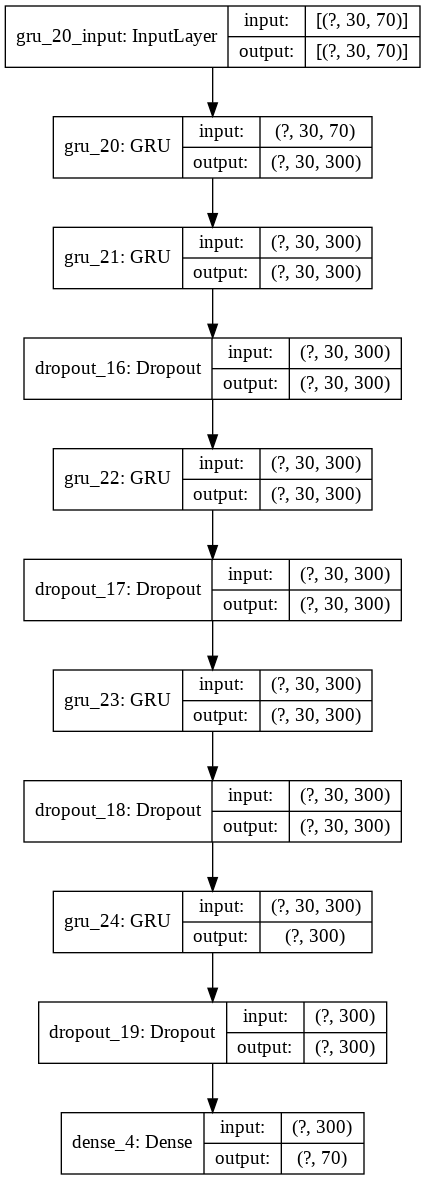

In [ ]:
plot_model(history.model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Text(0, 0.5, 'MSE')

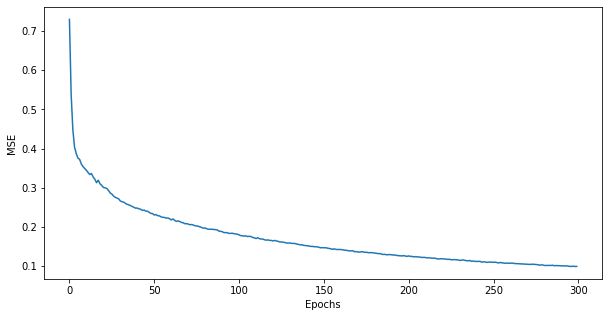

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.plot(history.history['mean_absolute_error'])
plt.xlabel("Epochs")
plt.ylabel("MSE")

##Gridsearchcv hyperparamter tunning

In [ ]:
layer_1_units=[20,40,60,80]
layer_2_units=[50,100,150,200]
layer_3_units=[50,100,150,200]
dropout=[0.1,0.2,0.3,0.4,0.5,0.6]
#layer_4_units=[20,40,60,200]
activation = [ 'relu', 'tanh', 'linear']
batch_size = [4,8,16,32,64,128]
epochs = [10, 20]
param_grid = dict(layer_1_units=layer_1_units,layer_2_units=layer_2_units,layer_3_units=layer_3_units,
                  activation=activation,batch_size=batch_size,dropout=dropout)
grid=GridSearchCV(estimator=model,param_grid=param_grid,verbose=1,n_jobs=1,cv=timeseriessplit)

In [ ]:
grid_result=grid.fit(X_train,y_train)

In [ ]:
pd.DataFrame(grid_result.cv_results_)

NameError: ignored

## bayesserach hyperparmeter tunning

In [ ]:
search_space = {"layer_1_units": Integer(50,400),
        "layer_2_units": Integer(50,400),
        "layer_3_units": Integer(50,400), 
        "dropout": Real(0.1,0.8),
        "activation": Categorical(['relu', 'tanh']),
        "batch_size": Integer(2,256),
        "epochs": Integer(5,100)}

In [ ]:
bayes = BayesSearchCV(estimator=model, search_spaces=search_space, 
                      n_jobs=1, cv=timeseriessplit,verbose=1,n_iter=25,return_train_score=True)

In [ ]:
bayes_result=bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/71
6/6 [==============================] - 1s 236ms/step - loss: 0.9995 - mean_absolute_error: 0.8366
Epoch 2/71
6/6 [==============================] - 1s 230ms/step - loss: 0.7597 - mean_absolute_error: 0.6883
Epoch 3/71
6/6 [==============================] - 1s 243ms/step - loss: 0.6540 - mean_absolute_error: 0.6355
Epoch 4/71
6/6 [==============================] - 2s 251ms/step - loss: 0.6168 - mean_absolute_error: 0.6096
Epoch 5/71
6/6 [==============================] - 2s 252ms/step - loss: 0.5845 - mean_absolute_error: 0.5808
Epoch 6/71
6/6 [==============================] - 1s 250ms/step - loss: 0.5774 - mean_absolute_error: 0.5911
Epoch 7/71
6/6 [==============================] - 1s 232ms/step - loss: 0.5551 - mean_absolute_error: 0.5606
Epoch 8/71
6/6 [==============================] - 1s 228ms/step - loss: 0.5367 - mean_absolute_error: 0.5583
Epoch 9/71
6/6 [==============================] - 1s 230ms/step - loss: 0.5299 - mean_absolute_error: 0.5468
Epoch 10/71
6/6 [==

In [ ]:
bayes_result.best_params_

OrderedDict([('activation', 'tanh'),
             ('batch_size', 128),
             ('dropout', 0.19800174810802604),
             ('epochs', 30),
             ('layer_1_units', 300),
             ('layer_2_units', 300),
             ('layer_3_units', 300)])

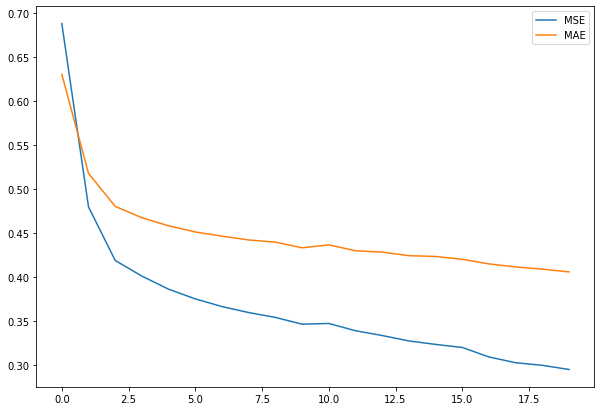

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(bayes_result.best_estimator_.model.history.history["loss"],label="MSE")
plt.plot(bayes_result.best_estimator_.model.history.history["mean_absolute_error"],label="MAE")
plt.legend()

In [ ]:
bayes_result.best_estimator_.model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_30 (GRU)                 (None, 30, 200)           163200    
_________________________________________________________________
gru_31 (GRU)                 (None, 30, 400)           722400    
_________________________________________________________________
dropout_20 (Dropout)         (None, 30, 400)           0         
_________________________________________________________________
gru_32 (GRU)                 (None, 164)               278472    
_________________________________________________________________
dropout_21 (Dropout)         (None, 164)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 70)                11550     
Total params: 1,175,622
Trainable params: 1,175,622
Non-trainable params: 0
___________________________________________

In [ ]:
pd.DataFrame(bayes_result.cv_results_)

In [ ]:
pd.DataFrame(bayes_result.cv_results_).to_csv("bayes_results.csv")

In [ ]:
bayes_results=pd.read_csv("/content/drive/MyDrive/M5 forecasting/bayesfinal.csv")
bayes_results.shape

(25, 29)

In [ ]:
bayes_results.head()

,Unnamed: 0,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_dropout,param_epochs,param_layer_1_units,param_layer_2_units,param_layer_3_units,params,rank_train_score
0,0,-0.864031,-0.850374,-0.730415,-1.057409,-1.170186,-0.934483,0.157701,22,-0.482875,-0.542794,-0.595639,-0.585728,-0.666563,-0.574720,0.060743,88.066502,34.153507,0.599247,0.137920,relu,254,0.742984,91,305,399,136,"OrderedDict([('activation', 'relu'), ('batch_s...",23
1,1,-0.963018,-0.614643,-0.450754,-0.707242,-0.769608,-0.701053,0.169399,15,-0.237086,-0.226164,-0.237015,-0.243081,-0.250668,-0.238803,0.008062,196.301198,88.033354,0.691911,0.146217,relu,42,0.286038,40,164,313,100,"OrderedDict([('activation', 'relu'), ('batch_s...",11
2,2,-1.495660,-0.638548,-0.444449,-0.691352,-0.748195,-0.803641,0.360790,20,-0.208453,-0.205753,-0.205076,-0.199857,-0.216455,-0.207119,0.005435,71.143729,29.819951,0.539797,0.026637,relu,219,0.115998,65,88,301,240,"OrderedDict([('activation', 'relu'), ('batch_s...",6
3,3,-0.823398,-0.610391,-0.433269,-0.656766,-0.745069,-0.653779,0.132379,9,-0.203751,-0.187648,-0.190466,-0.188596,-0.197976,-0.193687,0.006204,167.621541,76.295069,0.592848,0.011177,relu,49,0.180866,51,373,88,246,"OrderedDict([('activation', 'relu'), ('batch_s...",5
4,4,-0.957867,-0.582415,-0.463665,-0.700878,-0.785591,-0.698083,0.169401,13,-0.284039,-0.245197,-0.251597,-0.240759,-0.245927,-0.253504,0.015652,71.632196,25.512856,0.695529,0.218812,relu,225,0.314317,68,240,117,276,"OrderedDict([('activation', 'relu'), ('batch_s...",13


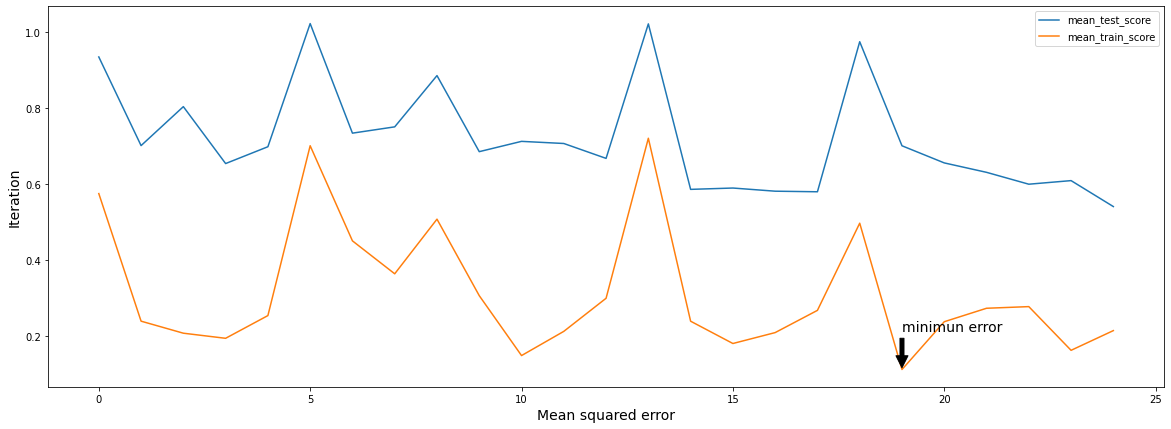

In [ ]:
abs(bayes_results["mean_test_score"]).plot(figsize=(20,7),label="mean_test_score")
abs(bayes_results["mean_train_score"]).plot(figsize=(20,7),label="mean_train_score")
x=np.argmin(abs(bayes_results["mean_train_score"]))
y=min(abs(bayes_results["mean_train_score"]))
plt.annotate("minimun error",(x,y),(x,y+0.1),fontsize=14,arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("Mean squared error",fontsize=14)
plt.ylabel("Iteration",fontsize=14)
plt.legend()

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

In [ ]:
min(abs(bayes_results["mean_test_score"]))

0.5311769008636474

In [ ]:
np.argmin(abs(bayes_results["mean_test_score"]))

37

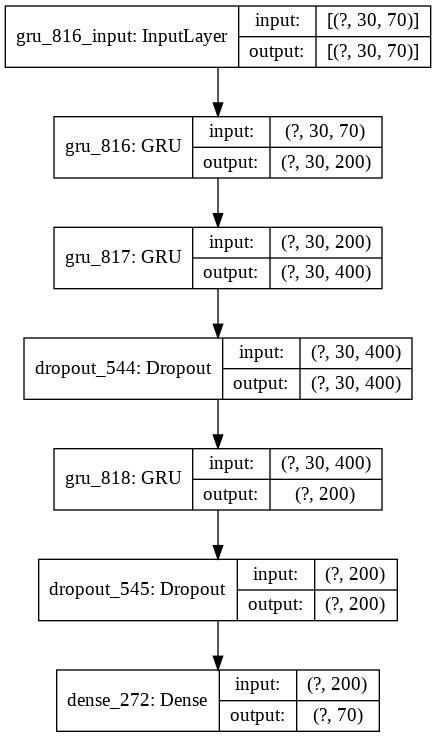

In [ ]:
plot_model(bayes_result.best_estimator_.model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##save & Load model

In [ ]:
bayes_result.best_estimator_.model.save("/content/drive/My Drive/M5 forecasting/Models/department_store_final3.h5")

In [ ]:
gru_model=load_model("/content/drive/My Drive/M5 forecasting/Models/department_store_final5.h5")

In [ ]:
gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_20 (GRU)                 (None, 30, 300)           334800    
_________________________________________________________________
gru_21 (GRU)                 (None, 30, 300)           541800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 300)           0         
_________________________________________________________________
gru_22 (GRU)                 (None, 30, 300)           541800    
_________________________________________________________________
dropout_17 (Dropout)         (None, 30, 300)           0         
_________________________________________________________________
gru_23 (GRU)                 (None, 30, 300)           541800    
_________________________________________________________________
dropout_18 (Dropout)         (None, 30, 300)          

## model evaluations

In [ ]:
inputs=train[-days:]
inputs=scaler.transform(inputs)
test_predictions=[]

current_batch=inputs.reshape((1,days,train.shape[1]))

for i in range(days):
    current_pred=gru_model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions = pd.DataFrame(data=true_predictions,columns=combined.columns)
true_predictions.set_index(test.index,inplace=True)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interactive,fixed,interact_manual
def compare_plot(a):
  test.iloc[:,a].plot(figsize=(20,8))
  true_predictions.iloc[:,a].plot(figsize=(20,8),label="prediction"+true_predictions.columns[a],linestyle='dashed')
  plt.legend(loc="upper left")
interact(compare_plot,a=(0,train.shape[1]-12,1))
plt.close()

interactive(children=(IntSlider(value=29, description='a', max=58), Output()), _dom_classes=('widget-interact'…

In [ ]:
residuals=true_predictions-test

In [ ]:
residuals.shape[1]

70

In [ ]:
residuals.head()

,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,TX_2_HOUSEHOLD_1,TX_2_HOUSEHOLD_2,TX_3_FOODS_1,TX_3_FOODS_2,TX_3_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_3_FOODS_1,WI_3_FOODS_2,WI_3_FOODS_3,WI_3_HOBBIES_1,WI_3_HOBBIES_2,WI_3_HOUSEHOLD_1,WI_3_HOUSEHOLD_2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-23,-38.059052,39.851135,266.120117,-14.843994,-3.872372,92.795288,-19.045288,-25.324585,-20.709229,53.046387,9.014587,12.202610,59.557739,-39.368195,-44.271912,52.030029,294.885498,-78.539551,-12.830833,-66.232178,-18.820770,0.641693,-10.692261,22.767090,12.186127,6.182468,47.997101,-19.417755,20.579514,52.475555,-25.021851,45.084320,0.372337,2.026855,-0.912933,8.281403,22.177612,1.741211,-19.155426,4.559723,36.945190,-17.550949,46.521271,93.690125,-57.414429,-33.929932,-14.958004,89.748108,14.983429,5.081085,73.318420,119.869629,123.957092,23.239578,37.116638,29.253082,46.563080,148.919312,43.848633,46.393890,6.438204,-59.058228,-28.445114,-20.277039,105.660706,27.947998,-72.465118,7.286659,29.140198,-32.006790
2016-04-24,1.443512,-40.382019,90.345459,-68.438416,-26.358753,112.456299,-23.127289,26.289429,-116.474854,-83.796387,15.763855,-15.959854,55.519409,23.998932,12.728546,-38.279724,497.593994,86.975281,-20.173473,3.728638,-29.380859,-38.948700,22.067352,76.780884,-79.487549,9.135372,-95.674347,-7.892548,20.103027,20.590881,105.122803,-17.149048,13.824276,19.469543,13.897964,60.529846,2.461304,309.736084,38.520386,0.946079,152.717651,5.416306,59.463470,91.020691,291.633545,-29.834534,11.848652,9.661011,9.747253,15.458008,6.890320,-40.314209,-55.592529,-9.783302,-1.172607,-8.309235,60.554810,147.497437,-31.455811,66.529510,-9.294147,-110.496399,-23.633057,-66.552734,45.739136,80.324951,20.900742,15.461571,19.726318,-3.014374
2016-04-25,-45.156067,36.300140,-200.295044,-99.880646,-13.531063,-58.442993,-25.120499,-97.227722,-48.249756,-255.765869,-18.306824,-5.321701,-44.683044,3.037430,-141.063416,-9.805725,9.209717,-14.234070,-40.121685,77.355835,-35.040497,-40.279938,-32.764038,-48.160767,-61.618774,-1.632184,17.531952,0.734772,-52.159866,62.022095,-127.157715,12.145859,-15.529659,10.159424,14.920853,4.548813,-60.903137,-113.123413,-35.862457,-11.594406,-81.213257,-9.782990,29.382736,-4.702332,-104.223022,30.038452,14.797581,-95.373718,4.087967,30.351746,-10.072327,-64.197021,-52.016327,0.392593,33.742462,8.407623,53.977478,194.696655,3.314331,3.308685,2.278572,-60.036621,9.021873,-38.608231,38.924530,-69.155518,11.110275,-7.026896,30.439514,12.831009
2016-04-26,-16.827332,-67.156555,50.950806,32.417236,1.128460,54.819397,-0.577255,-7.657715,-61.440796,17.707642,31.872955,-26.638609,-33.212097,-4.924469,-8.447296,9.107910,462.204346,-104.204926,-29.120659,123.896851,-32.912140,-131.552979,-23.264526,41.317749,76.551819,-4.259858,12.686707,-23.373245,1.152008,7.990082,21.925171,36.749298,-17.470264,8.154846,-19.533463,10.509232,14.970123,-124.951050,-61.769775,-10.296078,54.031860,-5.196732,-44.014954,62.275909,-185.607056,-13.605164,16.255959,-45.684326,8.003815,-12.160278,27.407166,-53.930054,-115.148071,-11.626755,-0.624390,-7.453568,30.817627,70.281189,72.414673,32.665100,-1.323782,-20.235352,-32.829346,-73.173630,71.398712,6

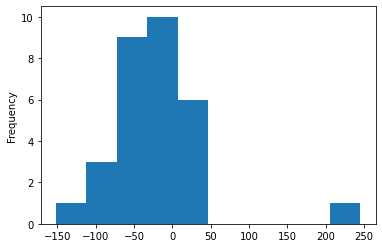

In [ ]:
residuals.iloc[:,1].plot(kind="hist")

In [ ]:
def compare_plot(a):
  residuals.iloc[:,a].plot(kind="line")
  plt.legend(loc="upper left")
interact(compare_plot,a=(0,residuals.shape[1]-1,1))
plt.close()

interactive(children=(IntSlider(value=34, description='a', max=69), Output()), _dom_classes=('widget-interact'…

In [ ]:
def compare_plot(a):
  residuals.iloc[:,a].plot(kind="hist")
  plt.legend(loc="upper left")
interact(compare_plot,a=(0,residuals.shape[1]-1,1))
plt.close()

interactive(children=(IntSlider(value=34, description='a', max=69), Output()), _dom_classes=('widget-interact'…

In [ ]:
MSE=mean_squared_error(y_true=test.iloc[:,:],y_pred=true_predictions.iloc[:,:])
MSE

14832.19451969789

In [ ]:
rmse = sqrt(MSE)
rmse

121.78749738662788

In [ ]:
true_predictions.describe()

,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,TX_2_HOUSEHOLD_1,TX_2_HOUSEHOLD_2,TX_3_FOODS_1,TX_3_FOODS_2,TX_3_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_3_FOODS_1,WI_3_FOODS_2,WI_3_FOODS_3,WI_3_HOBBIES_1,WI_3_HOBBIES_2,WI_3_HOUSEHOLD_1,WI_3_HOUSEHOLD_2
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,287.571320,533.658997,2270.678955,486.564240,40.195728,810.750244,225.287430,444.914917,480.165222,1959.115601,375.881531,40.099930,813.669495,321.563202,361.462463,681.317017,3061.218994,522.024475,53.388008,1487.908813,328.228333,215.966278,364.647522,1183.101807,352.769592,16.396746,407.772156,142.246140,188.475754,361.209503,1540.386230,255.634125,37.071953,760.695679,185.707779,252.608200,410.438812,1969.002075,338.712616,51.028122,778.743835,204.890961,274.443542,489.149506,1744.539795,344.753601,57.544186,777.703674,173.960785,313.991150,648.306030,1702.303345,403.095673,33.366138,603.141968,173.204010,383.174988,1095.271484,2224.915039,258.636505,30.080181,978.721619,140.661362,235.826904,567.867126,2023.198364,246.203705,33.113132,672.970764,158.162201
std,56.191521,117.371765,529.255676,75.327339,7.165632,214.018951,56.221962,101.543587,134.100525,495.842926,86.751160,9.159848,268.176971,96.253067,64.061134,109.396553,484.567444,89.142372,6.830102,271.960510,63.614037,23.203169,57.043800,147.026520,24.864183,2.037793,53.471645,15.614191,32.100388,56.192604,241.118347,44.400414,4.569418,129.766769,35.011040,30.036709,58.487331,324.950897,35.407360,5.338016,124.885811,35.166138,19.660988,48.774536,221.125870,43.910835,3.731955,103.763283,23.007866,62.793541,148.888489,393.021362,113.243835,8.134924,177.220978,39.154041,41.758823,148.385239,270.742859,29.379658,3.031019,144.819412,22.032593,43.272697,83.392662,360.686218,41.583721,5.262348,138.750641,32.429947
min,229.302811,406.715790,1789.844116,410.180054,29.468937,605.486328,173.014114,336.571198,341.166504,1515.234131,293.790985,25.678299,571.468628,242.149750,294.996124,541.847717,2564.599854,436.030762,39.878315,1206.628174,266.677338,188.135941,295.251343,1028.624634,323.815582,13.743001,351.256134,126.901588,149.645691,291.484528,1317.906860,213.227493,28.845419,643.414490,155.540009,208.516754,339.854523,1635.048950,302.230225,40.405594,651.031860,162.803268,241.374527,410.062439,1498.392944,298.026367,50.452007,659.885437,149.003815,255.160004,474.850677,1321.069946,301.869385,25.040585,436.022217,137.510666,324.370819,817.684570,1854.832153,219.758011,25.575453,789.764648,115.170654,181.878494,435.376709,1604.569458,202.310059,25.223373,512.850220,12

In [ ]:
test.mean().sort_values()

CA_4_HOBBIES_2      20.966667
WI_3_HOBBIES_2      35.433333
WI_2_HOBBIES_2      35.633333
WI_1_HOBBIES_2      39.066667
TX_1_HOBBIES_2      43.333333
                     ...     
CA_2_FOODS_3      2078.633333
WI_3_FOODS_3      2095.800000
CA_1_FOODS_3      2387.833333
WI_2_FOODS_3      2425.833333
CA_3_FOODS_3      2800.700000
Length: 70, dtype: float64

In [ ]:
test.describe()

,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,TX_2_HOUSEHOLD_1,TX_2_HOUSEHOLD_2,TX_3_FOODS_1,TX_3_FOODS_2,TX_3_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_3_FOODS_1,WI_3_FOODS_2,WI_3_FOODS_3,WI_3_HOBBIES_1,WI_3_HOBBIES_2,WI_3_HOUSEHOLD_1,WI_3_HOUSEHOLD_2
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,344.500000,552.366667,2387.833333,510.533333,49.100000,772.600000,240.466667,528.966667,558.733333,2078.633333,401.266667,52.266667,865.566667,344.100000,468.066667,698.800000,2800.700000,528.100000,75.266667,1404.900000,374.166667,264.466667,389.466667,1201.200000,376.766667,20.966667,425.633333,157.600000,255.433333,355.200000,1627.866667,257.000000,43.333333,764.800000,205.166667,288.200000,425.500000,2020.333333,364.600000,57.633333,770.733333,207.433333,333.466667,495.333333,1908.633333,357.133333,62.933333,808.966667,188.533333,366.166667,676.633333,1806.933333,397.133333,39.066667,604.600000,179.133333,464.166667,1161.433333,2425.833333,261.733333,35.633333,981.100000,153.666667,328.433333,593.200000,2095.800000,251.633333,35.433333,656.666667,165.033333
std,65.921976,108.842969,485.794911,108.007258,12.432854,175.824874,57.392018,119.486685,146.438626,464.550913,108.822517,19.174216,262.827947,104.518057,91.314890,119.517536,402.384029,85.029954,19.419033,248.239644,74.831343,37.108167,64.928466,150.790423,74.010103,6.935582,68.026609,23.876984,50.982542,70.733302,280.639999,61.847978,12.138094,155.321113,37.255024,56.573053,71.944303,305.153815,62.975419,13.252152,129.912951,36.981527,65.001185,101.627560,258.070892,64.662377,17.820820,116.522747,24.171418,65.508664,166.018379,366.489585,92.551098,13.263726,146.037926,39.577713,100.724645,367.913566,507.837273,43.117269,13.443325,198.672031,24.922408,57.809845,144.630182,423.118831,67.852011,10.542797,138.756381,39.896835
min,256.000000,400.000000,1718.000000,334.000000,28.000000,552.000000,155.000000,362.000000,359.000000,1420.000000,258.000000,26.000000,614.000000,226.000000,321.000000,452.000000,2202.000000,378.000000,48.000000,1021.000000,251.000000,201.000000,277.000000,977.000000,269.000000,10.000000,323.000000,125.000000,167.000000,239.000000,1202.000000,175.000000,26.000000,590.000000,150.000000,207.000000,303.000000,1454.000000,247.000000,40.000000,522.000000,163.000000,209.000000,344.000000,1472.000000,235.000000,36.000000,601.000000,141.000000,243.000000,472.000000,1375.000000,260.000000,9.000000,426.000000,124.000000,270.000000,724.000000,1643.000000,195.000000,15.000000,705.000000,110.000000,213.000000,340.000000,1476.000000,162.000000,11.000000,4

### Model evaluation function

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
def Evaluation(df1,df2):#Model evaluaiton function
  MSE_values=[]
  MAE_values=[]
  MAPE_values=[]
  series=[]
  for i in range(df1.shape[1]):
    MSE_values.append(mean_squared_error(df1.iloc[:,i],df2.iloc[:,i]))
    MAE_values.append(mean_absolute_error(df1.iloc[:,i],df2.iloc[:,i]))
    MAPE_values.append(mean_absolute_percentage_error(df1.iloc[:,i],df2.iloc[:,i]))
    series.append(df1.columns[i])
    d={"MSE":MSE_values,"MAE":MAE_values,"MAPE":MAPE_values}

  error=pd.DataFrame(d,index=df1.columns,columns=["MSE","MAE","MAPE"])
  return error

In [ ]:
gru_error=Evaluation(test,true_predictions)
gru_error.head()

,MSE,MAE,MAPE
CA_1_FOODS_1,4779.032897,57.485757,16.096276
CA_1_FOODS_2,4636.461142,45.753046,8.187570
CA_1_FOODS_3,49835.573879,186.655937,7.872531
CA_1_HOBBIES_1,5722.484733,63.405783,12.513764
CA_1_HOBBIES_2,162.264451,10.674109,20.804171


In [ ]:
gru_error["department"]=gru_error.index.str[5:]

In [ ]:
ax=pd.concat([gru_error,var_error],axis=1).iloc[:,:3].groupby("department").mean().plot(kind="bar",color=["k","r"],figsize=(10,6))
plt.legend(labels=["GRU","VAR"])
plt.ylabel("MAPE")
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f}%'.format(x)for x in vals]) 
plt.savefig("Department_MAPE",bbox_inches="tight")

In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive,interact
from IPython.display import display
import seaborn as sns
import matplotlib.ticker as mtick

def multiplot(a):
   df=gru_error[gru_error["department"]==a]
   plt.figure(figsize=(15,5))
   sns.lineplot(data=df, y="MAPE",x=df.index,)
   #df.plot(figsize=(20,7),kind="line")
   plt.xticks(rotation=30)
   #plt.set_xticks(range(0, 10))
   plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
   
interactive_plot = interactive(multiplot, a=gru_error["department"].unique())
output = interactive_plot.children[-1]
output.layout.height = '500px'
#output.layout.width='1500px'
interactive_plot

interactive(children=(Dropdown(description='a', options=('FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIE…

#VAR Model

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [ ]:
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    #print (adf)
    
    p = adf['p-value']
    if p <= signif:
        return adf['p-value'],"Stationary"
    else:
        return adf['p-value'],"Non-Stationary"

In [ ]:
adf_test(combined.iloc[:,1])

(0.00020132856597923683, 'Stationary')

In [ ]:
p_stat=[]
status=[]
for i in range(train.shape[1]):
  a,b=adf_test(train.iloc[:,i])
  p_stat.append(a)
  status.append(b)
sty=pd.DataFrame({"series":train.columns,"p_stat":p_stat,"Status":status})

In [ ]:
train_differenced = train.diff().dropna()

In [ ]:
p_stat=[]
status=[]
for i in range(train_differenced.shape[1]):
  a,b=adf_test(train_differenced.iloc[:,i])
  p_stat.append(a)
  status.append(b)
sty2=pd.DataFrame({"series":train.columns,"p_stat_differenced":p_stat,"Status_differenced":status})

In [ ]:
pd.merge(left=sty,right=sty2).to_csv("stationary_check.csv")

In [ ]:
var_model=VAR(train_differenced)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
res = var_model.select_order(12)
res.summary()

,AIC,BIC,FPE,HQIC
0,555.1,555.3,1.173e+241,555.2
1,540.0,554.5*,3.237e+234,545.3*
2,535.0,563.9,2.305e+232,545.6
3,533.1,576.2,3.447e+231,549.0
4,532.1,589.6,1.408e+231,553.3
5,531.3,603.2,7.696e+230,557.8
6,531.1*,617.2,7.438e+230*,562.8
7,531.7,632.2,1.938e+231,568.7
8,532.5,647.3,6.670e+231,574.8
9,533.2,662.3,2.220e+232,580.7


In [ ]:
pd.DataFrame(res.summary()).to_csv("res.csv")

In [ ]:
var_model_fit=var_model.fit(maxlags=6,verbose=1)

In [ ]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(var_model_fit.resid)

for col, val in zip(train.columns, out):
    print(col, ':', round(val, 2))

CA_1_FOODS_1 : 2.04
CA_1_FOODS_2 : 2.05
CA_1_FOODS_3 : 2.06
CA_1_HOBBIES_1 : 2.04
CA_1_HOBBIES_2 : 2.03
CA_1_HOUSEHOLD_1 : 2.12
CA_1_HOUSEHOLD_2 : 2.08
CA_2_FOODS_1 : 2.06
CA_2_FOODS_2 : 2.0
CA_2_FOODS_3 : 2.04
CA_2_HOBBIES_1 : 2.06
CA_2_HOBBIES_2 : 2.05
CA_2_HOUSEHOLD_1 : 2.09
CA_2_HOUSEHOLD_2 : 2.11
CA_3_FOODS_1 : 2.03
CA_3_FOODS_2 : 2.0
CA_3_FOODS_3 : 2.01
CA_3_HOBBIES_1 : 2.01
CA_3_HOBBIES_2 : 2.02
CA_3_HOUSEHOLD_1 : 2.03
CA_3_HOUSEHOLD_2 : 2.05
CA_4_FOODS_1 : 2.04
CA_4_FOODS_2 : 2.04
CA_4_FOODS_3 : 2.05
CA_4_HOBBIES_1 : 2.06
CA_4_HOBBIES_2 : 2.0
CA_4_HOUSEHOLD_1 : 2.07
CA_4_HOUSEHOLD_2 : 2.03
TX_1_FOODS_1 : 2.01
TX_1_FOODS_2 : 2.08
TX_1_FOODS_3 : 2.06
TX_1_HOBBIES_1 : 2.06
TX_1_HOBBIES_2 : 2.0
TX_1_HOUSEHOLD_1 : 2.06
TX_1_HOUSEHOLD_2 : 2.03
TX_2_FOODS_1 : 2.01
TX_2_FOODS_2 : 2.07
TX_2_FOODS_3 : 2.07
TX_2_HOBBIES_1 : 2.03
TX_2_HOBBIES_2 : 2.02
TX_2_HOUSEHOLD_1 : 2.08
TX_2_HOUSEHOLD_2 : 2.08
TX_3_FOODS_1 : 2.02
TX_3_FOODS_2 : 2.05
TX_3_FOODS_3 : 2.06
TX_3_HOBBIES_1 : 2.04
TX_3_HOBBI

In [ ]:
predictions=var_model_fit.forecast(var_model_fit.y, steps=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [ ]:
var_pred=pd.DataFrame(data=predictions,columns=test.columns,index=test.index)

In [ ]:
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc =pd.DataFrame()
    columns = df_train.columns
    for col in columns:
      df_fc[str(col)] = df_train[col].iloc[-1] + df_forecast[str(col)].cumsum()
    return df_fc
df_results = invert_transformation(train,var_pred)

# Model comparison

In [ ]:
from ipywidgets import interact, interactive,fixed,interact_manual
import ipywidgets as widgets

def compare_plot_1(a):
  figsize=(20,8)
  fontdict={"size":14}
  test.iloc[:,a].plot(figsize=figsize,label="actual")
  df_results.iloc[:,a].plot(figsize=figsize,label="VAR forecast",linestyle='dashed' )
  true_predictions.iloc[:,a].plot(figsize=figsize,label="GRU forecast",linestyle='dashed')
  plt.legend(loc="upper left", prop={'size': 14})
  plt.ylabel("Sales",fontdict=fontdict)
  plt.xlabel("Date",fontdict=fontdict)
  plt.title(label=test.columns[a],fontdict=fontdict)
  path="/content/plot/"
  #plt.savefig(path+test.columns[a],bbox_inches='tight',)|
interact(compare_plot_1,a=(0,df_results.shape[1]-1,1))

interactive(children=(IntSlider(value=34, description='a', max=69), Output()), _dom_classes=('widget-interact'…

<function __main__.compare_plot_1>

In [ ]:
residuals_VAR=df_results-test

In [ ]:
def compare_plot(a):
  residuals.iloc[:,a].plot(kind="hist",color="g",alpha=0.7)
  residuals_VAR.iloc[:,a].plot(kind="hist",alpha=0.7)
  plt.legend(loc="upper left")
interact(compare_plot,a=(0,residuals_VAR.shape[1]-1,1))
plt.close()

interactive(children=(IntSlider(value=34, description='a', max=69), Output()), _dom_classes=('widget-interact'…

In [ ]:
for a in range(test.shape[1]):
  figsize=(20,8)
  fontdict={"size":14}
  test.iloc[:,a].plot(figsize=figsize,label="actual")
  df_results.iloc[:,a].plot(figsize=figsize,label="VAR forecast",linestyle='dashed' )
  true_predictions.iloc[:,a].plot(figsize=figsize,label="GRU forecast",linestyle='dashed')
  plt.legend(loc="upper left", prop={'size': 14})
  plt.ylabel("Sales",fontdict=fontdict)
  plt.xlabel("Date",fontdict=fontdict)
  plt.title(label=test.columns[a],fontdict=fontdict)
  path="/content/plot/"
  #plt.savefig(path+test.columns[a],bbox_inches='tight')
  plt.close()

In [ ]:
var_eval=Evaluation(test,df_results)
var_eval=var_eval.add_prefix("var_")

In [ ]:
gru_eval=Evaluation(test,true_predictions)
gru_eval=gru_eval.add_prefix("Gru_")

In [ ]:
eval=pd.concat([gru_eval,var_eval],axis=1)

In [ ]:
#eval.to_csv("Error.csv")

In [ ]:
#eval.describe().to_csv("stats.csv")

In [ ]:
eval.describe()

,Gru_MSE,Gru_MAE,Gru_MAPE,var_MSE,var_MAE,var_MAPE
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,14832.194520,70.856427,13.980823,15720.461149,72.866873,14.872182
std,29488.120831,63.204196,6.349236,34622.858799,66.721586,7.213108
min,69.187742,6.658272,5.879361,79.137983,7.211794,5.346938
25%,1439.104951,29.117969,9.565706,1818.276248,32.568033,9.451658
50%,4363.643611,50.055633,11.683547,5136.176001,57.134886,12.495561
75%,10953.564077,85.908329,16.049871,12431.765508,86.237720,18.970173
max,185366.225030,288.077165,31.817040,238433.415837,379.228646,38.241682


In [ ]:
eval["department"]=eval.index.str[5:]

Text(0, 0.5, 'MAE')

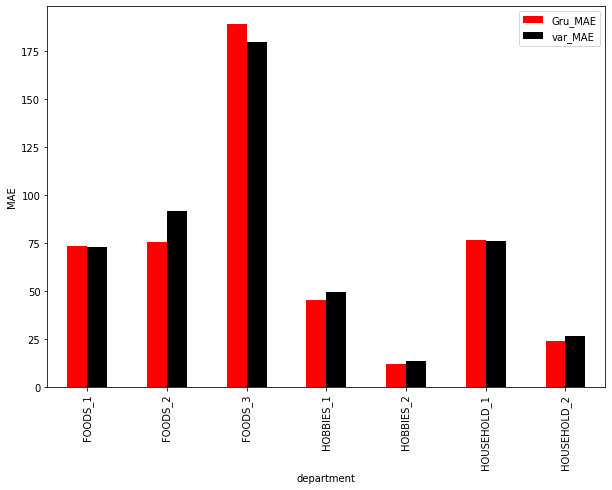

In [ ]:
ax=eval.groupby("department").mean().filter(like='MAE', axis=1).plot(figsize=(10,7),kind="bar",color=["r","k"])
vals = ax.get_yticks()
#ax.set_yticklabels(['{:.0f}%'.format(x)for x in vals]) 
plt.ylabel("MAE")


In [ ]:
var_error=Evaluation(test,df_results)
var_error["department"]=var_error.index.str[5:]

In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive,interact
from IPython.display import display


def multiplot(a):
  df=var_error[var_error["department"]==a]
  df2=gru_error[gru_error["department"]==a]
  plt.figure(figsize=(15,5))
  sns.lineplot(data=df, y="MAPE",x=df.index,label="VAR",color="orange")
  sns.lineplot(data=df2, y="MAPE",x=df2.index,label="GRU",color="g")
  plt.xlabel("Series",fontdict={"size":12})
  plt.legend()
  plt.xticks(rotation=30)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
  path="/content/plot/"
  #plt.savefig(path+a,bbox_inches='tight',)
   
interactive_plot = interactive(multiplot, a=var_error["department"].unique())
output = interactive_plot.children[-1]
output.layout.height = '500px'
#output.layout.width='1500px'
interactive_plot

interactive(children=(Dropdown(description='a', options=('FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIE…

In [ ]:
from google.colab import files
files.download("/content/plot")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive,interact
from IPython.display import display

def multiplot(a):
  plt.figure(figsize=(15,5))
  df=var_error[var_error["department"]==a]
  df2=gru_error[gru_error["department"]==a]
  plt.figure(figsize=(15,5))
  sns.lineplot(data=df, y="MSE",x=df.index,label="VAR",color="orange")
  sns.lineplot(data=df2, y="MSE",x=df2.index,label="GRU",color="g")
  plt.legend()
  plt.xticks(rotation=30)

   
interactive_plot = interactive(multiplot, a=var_error["department"].unique())
output = interactive_plot.children[-1]
output.layout.height = '400px'
#output.layout.width='1500px'
interactive_plot

interactive(children=(Dropdown(description='a', options=('FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIE…

In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive,interact
from IPython.display import display

def multiplot(a):
  plt.figure(figsize=(15,5))
  df=var_error[var_error["department"]==a]
  df2=gru_error[gru_error["department"]==a]
  plt.figure(figsize=(15,5))
  sns.lineplot(data=df, y="MAE",x=df.index,label="VAR",color="orange")
  sns.lineplot(data=df2, y="MAE",x=df2.index,label="GRU",color="g")
  plt.legend()
  plt.xticks(rotation=30)

   
interactive_plot = interactive(multiplot, a=var_error["department"].unique())
output = interactive_plot.children[-1]
output.layout.height = '400px'
#output.layout.width='1500px'
interactive_plot

interactive(children=(Dropdown(description='a', options=('FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIE…

#lstm model

In [ ]:
def lstm_model(optimizer="adam",neurons=100):
    model=Sequential()
    
    layer_1_units=40
    model.add(lstm(units = layer_1_units, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    # Adding a second Grulayer and some Dropout regularisation
    layer_2_units=neurons
    model.add(lstm(units = layer_2_units,return_sequences=True))
    model.add(Dropout(0.2))

    layer_3_units=neurons
    model.add(GRU(units = layer_3_units))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = train.shape[1]))
    
    model.compile(optimizer = optimizer, loss = 'mean_squared_error',metrics=["accuracy", 'mape'])
    
    return model

In [ ]:
model_lstm = KerasRegressor(build_fn=GRU_model, epochs=16, batch_size=8, verbose=1)

In [ ]:
neurons = [150,200,250]
param_grid = dict(neurons=neurons)
grid_lstm = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=timeseriessplit,verbose=1)

In [ ]:
grid_result_lstm=grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/16
41/41 [==============================] - 2s 53ms/step - loss: 0.6849 - accuracy: 0.0436 - mape: 1370.1437
Epoch 2/16
41/41 [==============================] - 2s 52ms/step - loss: 0.5013 - accuracy: 0.1371 - mape: 897.8947
Epoch 3/16
41/41 [==============================] - 2s 53ms/step - loss: 0.4097 - accuracy: 0.2741 - mape: 846.1920
Epoch 4/16
41/41 [==============================] - 2s 51ms/step - loss: 0.3845 - accuracy: 0.3707 - mape: 1094.5354
Epoch 5/16
41/41 [==============================] - 2s 49ms/step - loss: 0.3571 - accuracy: 0.5047 - mape: 2135.3667
Epoch 6/16
41/41 [==============================] - 2s 50ms/step - loss: 0.3444 - accuracy: 0.5670 - mape: 1647.3292
Epoch 7/16
41/41 [==============================] - 2s 49ms/step - loss: 0.3213 - accuracy: 0.6324 - mape: 2749.2661
Epoch 8/16
41/41 [==============================] - 2s 50ms/step - loss: 0.3052 - accuracy: 0.7165 - mape: 2037.7124
Epoch 9/16
41/41 [==============================] - 2s 50ms/step -

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 41.1min finished


Epoch 1/16
239/239 [==============================] - 19s 78ms/step - loss: 0.5085 - accuracy: 0.2679 - mape: 702.4872
Epoch 2/16
239/239 [==============================] - 19s 78ms/step - loss: 0.3500 - accuracy: 0.7038 - mape: 870.3866
Epoch 3/16
239/239 [==============================] - 19s 78ms/step - loss: 0.3031 - accuracy: 0.8121 - mape: 931.2518
Epoch 4/16
239/239 [==============================] - 19s 78ms/step - loss: 0.2815 - accuracy: 0.8289 - mape: 885.6248
Epoch 5/16
239/239 [==============================] - 18s 77ms/step - loss: 0.2753 - accuracy: 0.8247 - mape: 1127.2913
Epoch 6/16
239/239 [==============================] - 18s 77ms/step - loss: 0.2643 - accuracy: 0.8273 - mape: 868.4536
Epoch 7/16
239/239 [==============================] - 19s 78ms/step - loss: 0.2614 - accuracy: 0.8299 - mape: 1051.1122
Epoch 8/16
239/239 [==============================] - 21s 90ms/step - loss: 0.2543 - accuracy: 0.8273 - mape: 871.4771
Epoch 9/16
239/239 [==========================

In [ ]:
grid_result_lstm.best_params_

{'neurons': 200}

In [ ]:
grid_result_lstm.best_estimator_.model.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_189 (GRU)                (None, 30, 40)            10080     
_________________________________________________________________
dropout_189 (Dropout)        (None, 30, 40)            0         
_________________________________________________________________
gru_190 (GRU)                (None, 30, 200)           145200    
_________________________________________________________________
dropout_190 (Dropout)        (None, 30, 200)           0         
_________________________________________________________________
gru_191 (GRU)                (None, 200)               241200    
_________________________________________________________________
dropout_191 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 42)              

In [ ]:
grid_result_lstm.best_estimator_.model.save("/content/drive/My Drive/M5 forecasting/best_model_using_days_lstm.h5")

In [ ]:
inputs=train[-30:]
inputs=scaler.transform(inputs)

In [ ]:
test_predictions=[]

current_batch=inputs.reshape((1,30,train.shape[1]))

for i in range(30):
    current_pred=grid_result_lstm.best_estimator_.model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions = pd.DataFrame(data=true_predictions,columns=combined.columns)
true_predictions.set_index(test.index,inplace=True)

In [ ]:
def compare_plot(a):
  test.iloc[:,a].plot(figsize=(20,8))
  true_predictions.iloc[:,a].plot(figsize=(20,8))
  plt.legend()
interact(compare_plot,a=(0,29,1))

interactive(children=(IntSlider(value=14, description='a', max=29), Output()), _dom_classes=('widget-interact'…

<function __main__.compare_plot>

In [ ]:
lstm_score=mean_absolute_percentage_error(test.iloc[:,:30],true_predictions.iloc[:,:30])